Task-5: Analyze traffic accident data to identify patterns related to road conditions, weather, and time of day. Visualize accident hotspots and contributing factors. 

In [16]:
import pandas as pd

accident_data = pd.read_csv("Road Accident Data.csv")
display(accident_data.info())
accident_data.head()
display(accident_data.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307973 entries, 0 to 307972
Data columns (total 21 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Accident_Index              307973 non-null  object 
 1   Accident Date               307973 non-null  object 
 2   Day_of_Week                 307973 non-null  object 
 3   Junction_Control            307973 non-null  object 
 4   Junction_Detail             307973 non-null  object 
 5   Accident_Severity           307973 non-null  object 
 6   Latitude                    307973 non-null  float64
 7   Light_Conditions            307973 non-null  object 
 8   Local_Authority_(District)  307973 non-null  object 
 9   Carriageway_Hazards         5424 non-null    object 
 10  Longitude                   307973 non-null  float64
 11  Number_of_Casualties        307973 non-null  int64  
 12  Number_of_Vehicles          307973 non-null  int64  
 13  Police_Force  

None

Accident_Index                     0
Accident Date                      0
Day_of_Week                        0
Junction_Control                   0
Junction_Detail                    0
Accident_Severity                  0
Latitude                           0
Light_Conditions                   0
Local_Authority_(District)         0
Carriageway_Hazards           302549
Longitude                          0
Number_of_Casualties               0
Number_of_Vehicles                 0
Police_Force                       0
Road_Surface_Conditions          317
Road_Type                       1534
Speed_limit                        0
Time                              17
Urban_or_Rural_Area                0
Weather_Conditions              6057
Vehicle_Type                       0
dtype: int64

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

accident_data['Accident Date'] = pd.to_datetime(accident_data['Accident Date'], format='%m/%d/%Y') 
accident_data['Time'] = pd.to_datetime(accident_data['Time'], format='%H:%M').dt.time 


In [20]:
accident_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5424 entries, 195 to 307972
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Accident_Index              5424 non-null   object        
 1   Accident Date               5424 non-null   datetime64[ns]
 2   Day_of_Week                 5424 non-null   object        
 3   Junction_Control            5424 non-null   object        
 4   Junction_Detail             5424 non-null   object        
 5   Accident_Severity           5424 non-null   object        
 6   Latitude                    5424 non-null   float64       
 7   Light_Conditions            5424 non-null   object        
 8   Local_Authority_(District)  5424 non-null   object        
 9   Carriageway_Hazards         5424 non-null   object        
 10  Longitude                   5424 non-null   float64       
 11  Number_of_Casualties        5424 non-null   int64        

In [18]:
accident_data = accident_data.dropna(subset=['Carriageway_Hazards'])

accident_data['Road_Surface_Conditions'].fillna('Unknown', inplace=True)
accident_data['Road_Type'].fillna('Unknown', inplace=True)
accident_data['Weather_Conditions'].fillna('Unknown', inplace=True)

accident_data = accident_data.dropna(subset=['Time'])
accident_data.isnull().sum()


Accident_Index                0
Accident Date                 0
Day_of_Week                   0
Junction_Control              0
Junction_Detail               0
Accident_Severity             0
Latitude                      0
Light_Conditions              0
Local_Authority_(District)    0
Carriageway_Hazards           0
Longitude                     0
Number_of_Casualties          0
Number_of_Vehicles            0
Police_Force                  0
Road_Surface_Conditions       0
Road_Type                     0
Speed_limit                   0
Time                          0
Urban_or_Rural_Area           0
Weather_Conditions            0
Vehicle_Type                  0
dtype: int64

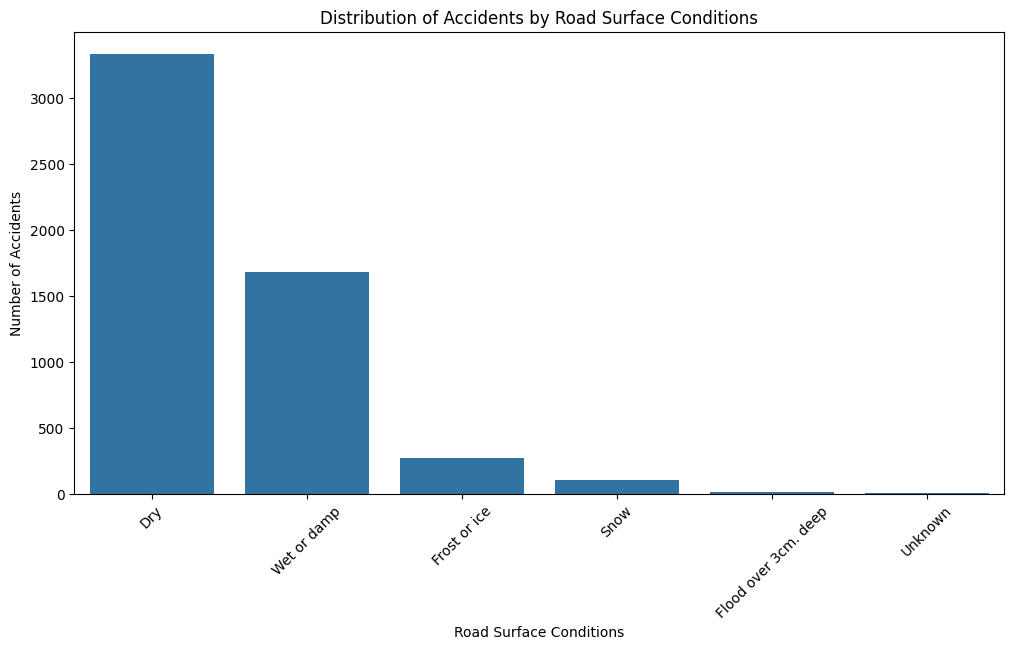

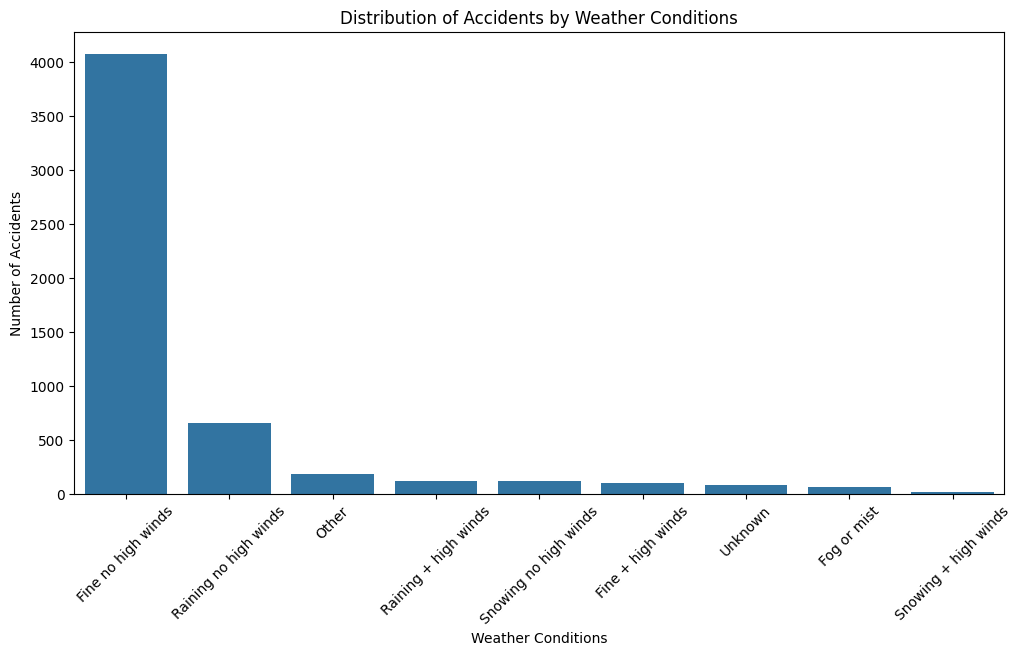

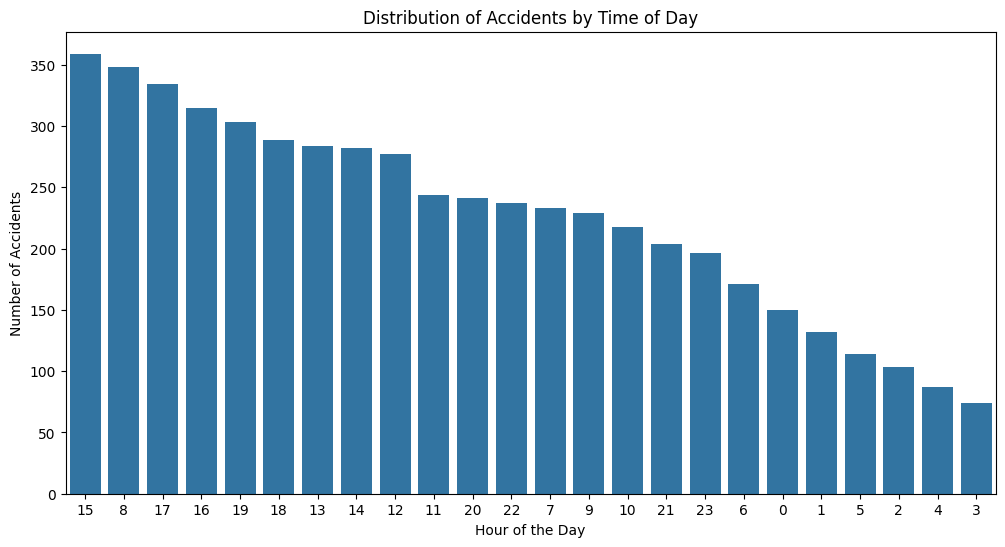

In [21]:
# Plotting distribution of accidents based on road conditions
plt.figure(figsize=(12, 6))
sns.countplot(data=accident_data, x='Road_Surface_Conditions', order=accident_data['Road_Surface_Conditions'].value_counts().index)
plt.title('Distribution of Accidents by Road Surface Conditions')
plt.xlabel('Road Surface Conditions')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)
plt.show()

# Plotting distribution of accidents based on weather conditions
plt.figure(figsize=(12, 6))
sns.countplot(data=accident_data, x='Weather_Conditions', order=accident_data['Weather_Conditions'].value_counts().index)
plt.title('Distribution of Accidents by Weather Conditions')
plt.xlabel('Weather Conditions')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)
plt.show()

# Extract hour from time for plotting time of day
accident_data['Hour'] = accident_data['Time'].apply(lambda x: x.hour)

# Plotting distribution of accidents based on time of day
plt.figure(figsize=(12, 6))
sns.countplot(data=accident_data, x='Hour', order=accident_data['Hour'].value_counts().index)
plt.title('Distribution of Accidents by Time of Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Accidents')
plt.show()


In [27]:
import folium
from folium.plugins import HeatMap

base_map = folium.Map(location=[accident_data['Latitude'].mean(), accident_data['Longitude'].mean()], zoom_start=10)

heat_data = [[row['Latitude'], row['Longitude']] for index, row in accident_data.iterrows()]
HeatMap(heat_data).add_to(base_map)

base_map


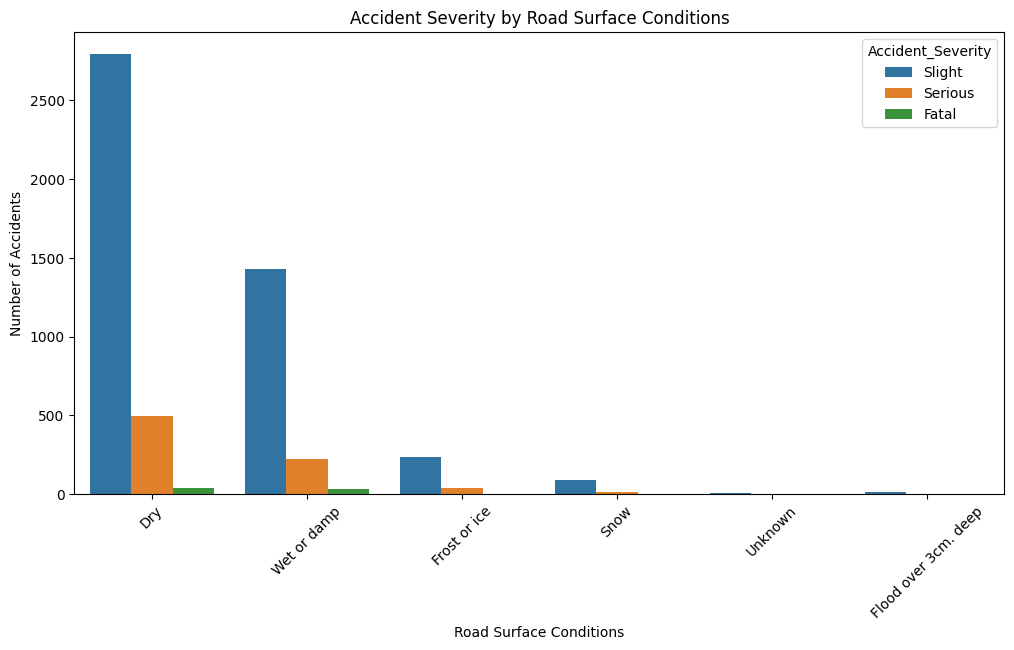

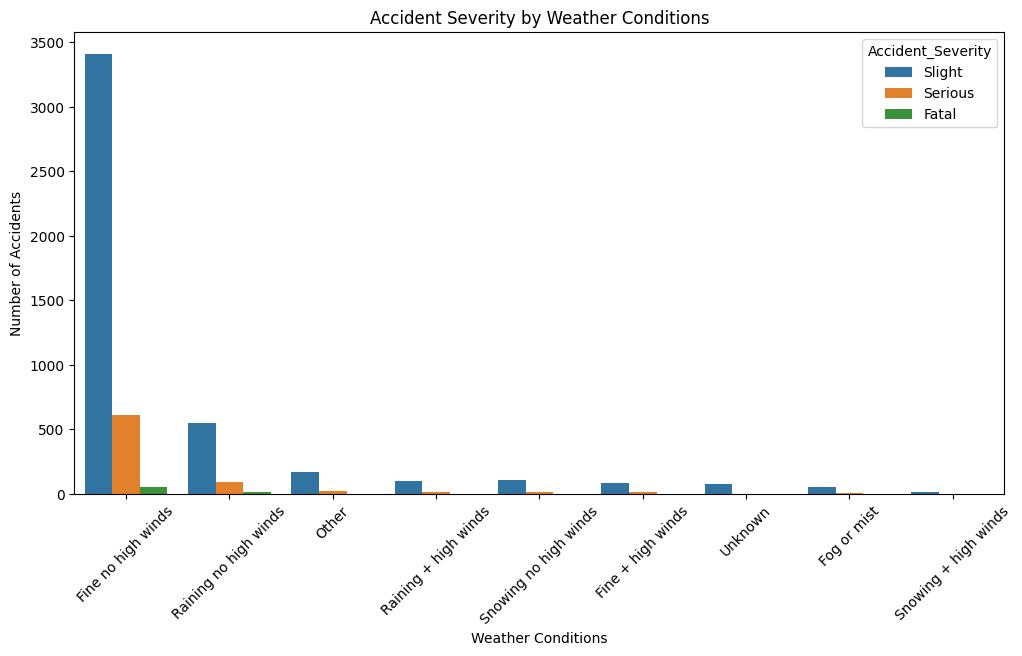

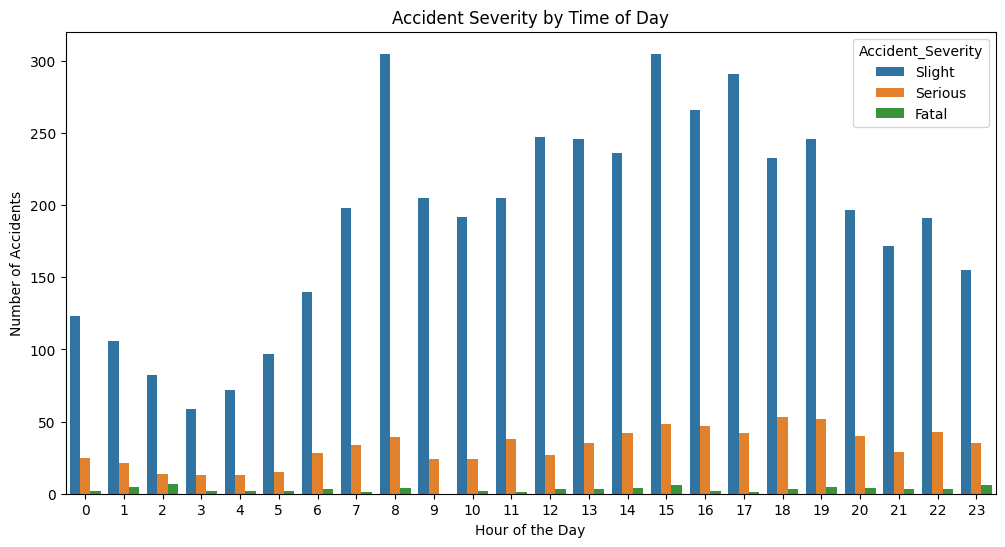

In [28]:
# Severity vs Road Surface Conditions
plt.figure(figsize=(12, 6))
sns.countplot(data=accident_data, x='Road_Surface_Conditions', hue='Accident_Severity')
plt.title('Accident Severity by Road Surface Conditions')
plt.xlabel('Road Surface Conditions')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)
plt.show()

# Severity vs Weather Conditions
plt.figure(figsize=(12, 6))
sns.countplot(data=accident_data, x='Weather_Conditions', hue='Accident_Severity')
plt.title('Accident Severity by Weather Conditions')
plt.xlabel('Weather Conditions')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)
plt.show()

# Severity vs Time of Day
plt.figure(figsize=(12, 6))
sns.countplot(data=accident_data, x='Hour', hue='Accident_Severity')
plt.title('Accident Severity by Time of Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Accidents')
plt.show()
